## Final Project

### Analysis of features extarcted from audio data

- link to dataset:

### Motivation and Goals

The goal of this project is to clasdify voice recoridngs as either male of female, based on numerical features extracted from the Mozilla common voice dataset.
The purpose of this project is ...


In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


## Data Loading

In [2]:
with open("./data/data.csv", "r") as file:
    data_raw = pd.read_csv(file)

data_raw.head()

,path,sentence,sentence_domain,age,gender,accents,mfcc_01_mean,mfcc_02_mean,mfcc_03_mean,mfcc_04_mean,...,spec_contrast_band_4_std,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std
0,./clips/common_voice_en_40187705.mp3,Any new copies were initialized with a success...,NaN,fifties,male_masculine,Canadian English,-449.487457,119.852509,7.753420,30.211107,...,4.427589,3.374920,8.790948,4.794475,4491.619810,2971.032386,0.078209,0.080991,0.021588,0.023391
1,./clips/common_voice_en_40187697.mp3,He then led the life of a wandering hermit.,NaN,fifties,male_masculine,Canadian English,-494.584290,125.826019,18.260662,23.508959,...,4.600072,4.264892,7.531223,4.263827,4458.521793,2792.566125,0.061128,0.059886,0.016811,0.020808
2,./clips/common_voice_en_40187695.mp3,Artume appeared as a recurring character in Ma...,NaN,fifties,male_masculine,Canadian English,-503.006805,131.359589,15.189734,18.775719,...,4.263854,6.058417,6.529373,3.953812,4289.709689,2843.069699,0.067131,0.057595,0.013110,0.014007
3,./clips/common_voice_en_40187693.mp3,Cohousing cultivates a culture of sharing and ...,NaN,fifties,male_masculine,Canadian English,-466.040344,111.497826,7.834814,21.756237,...,4.760368,4.768118,6.406526,3.485832,4421.248209,2540.725526,0.072797,0.060684,0.015802,0.019355
4,./clips/common_voice_en_40187696.mp3,In practice however the resistive element vari...,NaN,fifties,male_masculine,Canadian English,-473.256073,116.954979,12.820942,26.763842,...,4.252196,4.170021,5.473282,3.982934,4656.431159,2868.399050,0.082116,0.086288,0.016562,0.018280


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45358 entries, 0 to 45357
Data columns (total 94 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   path                       45358 non-null  object 
 1   sentence                   45358 non-null  object 
 2   sentence_domain            384 non-null    object 
 3   age                        44929 non-null  object 
 4   gender                     45358 non-null  object 
 5   accents                    38582 non-null  object 
 6   mfcc_01_mean               45358 non-null  float64
 7   mfcc_02_mean               45358 non-null  float64
 8   mfcc_03_mean               45358 non-null  float64
 9   mfcc_04_mean               45358 non-null  float64
 10  mfcc_05_mean               45358 non-null  float64
 11  mfcc_06_mean               45358 non-null  float64
 12  mfcc_07_mean               45358 non-null  float64
 13  mfcc_08_mean               45358 non-null  flo

In [5]:
# Sentence domain column has less than 400 rows
# Null values in columns accents and age

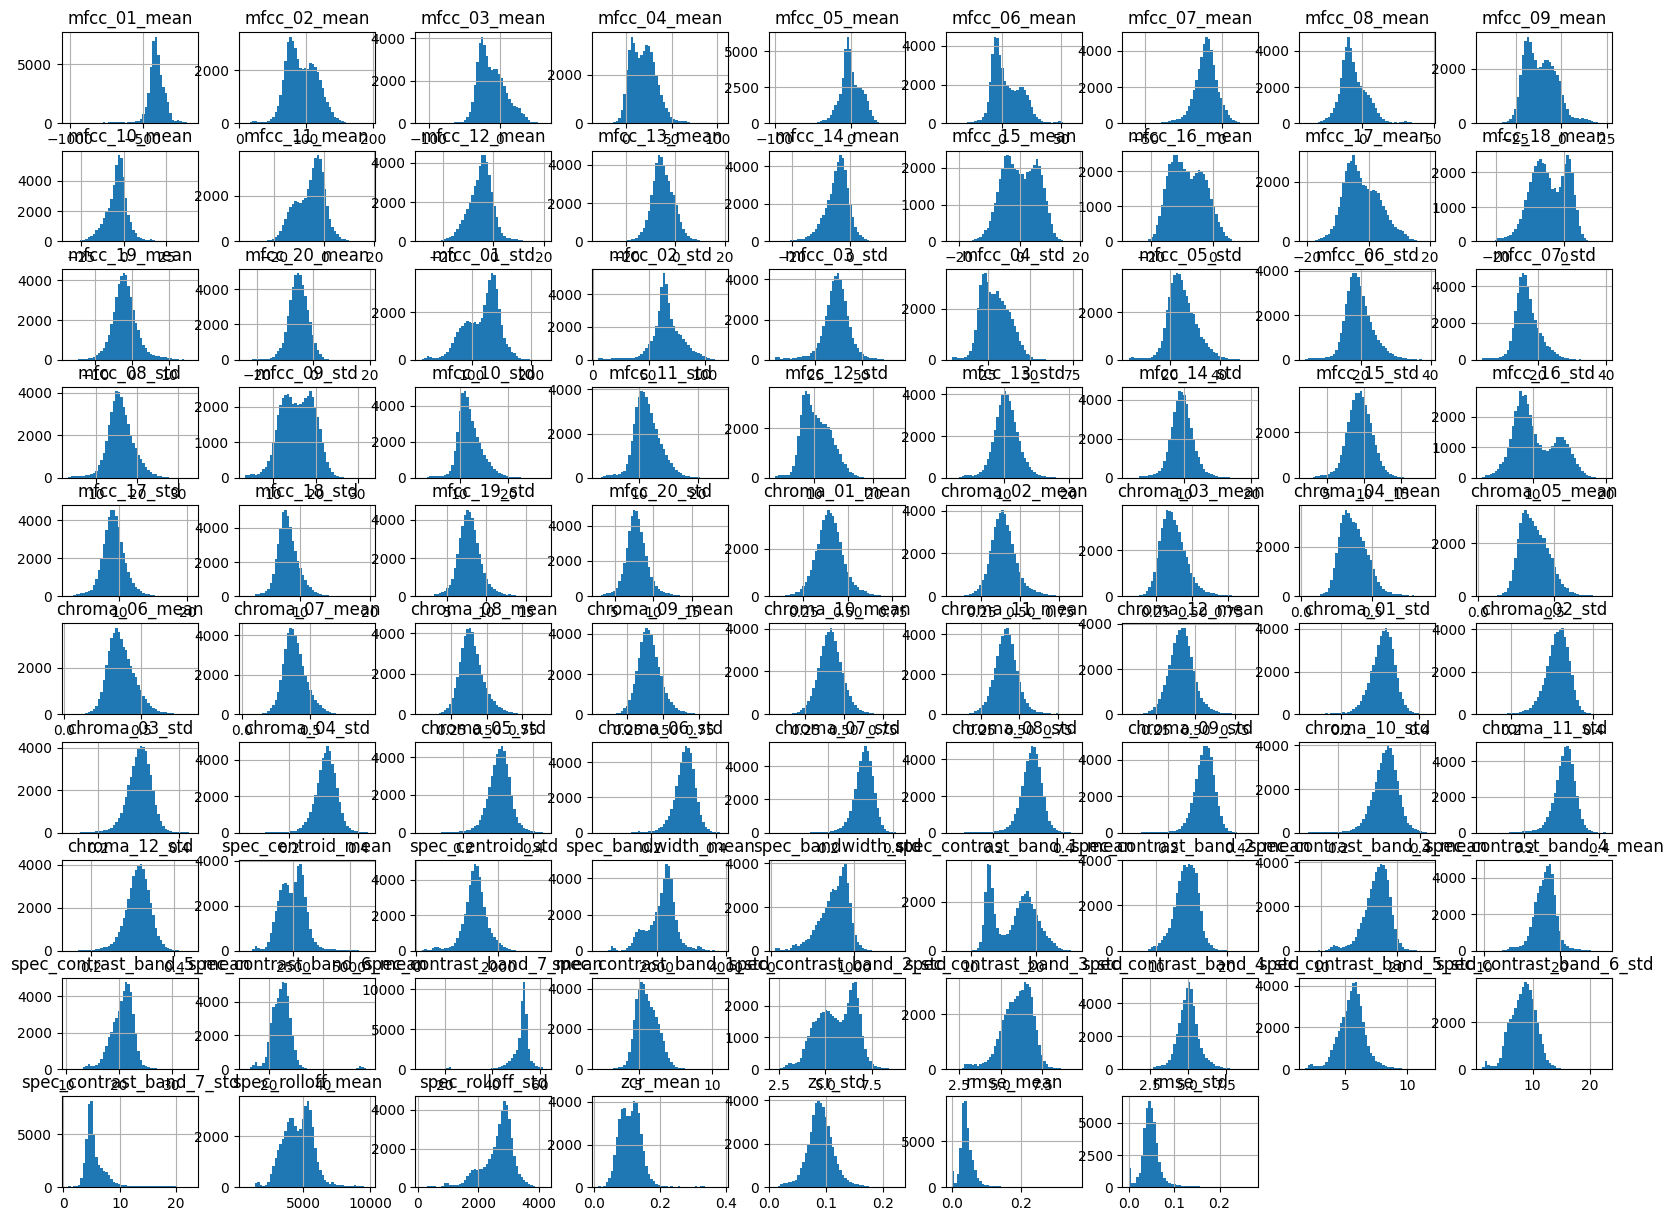

In [4]:
def histograms(data):
    """
    Function to plot histograms of the dataframe
    :param data: DataFrame
    :return: None
    """
    data.hist(figsize=(20, 15), bins=50)
    plt.show()
histograms(data_raw)

In [5]:
# drop sentence_domain
try:
    data_raw = data_raw.drop(columns=["sentence_domain"])
except:
    print("Column sentence_domain dropped")

In [11]:
y= data_raw["gender"]
X= data_raw.drop(columns=["gender", "path", "age", "sentence", "accents"])

# Train test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state= 27)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state= 27)

In [12]:
X_train.shape

(31750, 88)

In [13]:
X_val.shape

(6804, 88)

## EDA

In [15]:
data_raw.describe()

,mfcc_01_mean,mfcc_02_mean,mfcc_03_mean,mfcc_04_mean,mfcc_05_mean,mfcc_06_mean,mfcc_07_mean,mfcc_08_mean,mfcc_09_mean,mfcc_10_mean,...,spec_contrast_band_4_std,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std
count,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,...,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000,45358.000000
mean,-413.312954,93.823479,-11.062694,19.232826,0.018813,3.887656,-10.201332,-5.936500,-11.200684,-3.908554,...,5.023911,5.531940,8.393671,6.018052,4630.727460,2636.063587,0.113118,0.089776,0.044959,0.050718
std,77.021224,22.966793,19.415232,13.728738,13.573066,12.351489,7.570344,9.244700,8.631111,6.384909,...,0.707053,1.086150,2.189325,2.898502,1161.856951,549.878533,0.037467,0.023280,0.028279,0.026065
min,-1009.371521,8.527754,-109.845596,-29.976082,-99.547256,-42.214890,-60.356888,-39.346924,-43.236217,-32.694038,...,1.088558,1.785507,1.225389,0.830508,614.009534,132.853695,0.014346,0.010137,0.000007,0.000007
25%,-437.399200,76.560682,-25.662302,8.164198,-7.747386,-5.363337,-14.276426,-11.813797,-18.112986,-7.261864,...,4.606838,4.893319,6.935425,4.516315,3820.282388,2391.773151,0.087264,0.076256,0.031706,0.038324
50%,-410.583328,91.422825,-14.327928,18.614068,-1.315416,0.800746,-9.806545,-7.440382,-12.065773,-3.358245,...,5.019537,5.593451,8.515515,5.110147,4653.010912,2770.039084,0.111559,0.089141,0.039839,0.047953
75%,-377.211464,110.986599,1.453691,28.406997,9.326246,13.201524,-5.679545,-0.594520,-5.213984,-0.340330,...,5.397709,6.160684,9.897321,6.460226,5395.250006,2985.874105,0.133434,0.103205,0.051988,0.058496
max,-166.984146,193.673172,64.433517,105.173409,63.279827,62.071381,19.852123,46.526283,24.392496,39.869076,...,9.229922,11.747129,22.740114,22.756141,9875.266638,4217.979050,0.388499,0.226764,0.357266,0.271961
